# Classifying galaxy morphologies using deep learning
Data set: https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge

In [1]:
# prevents rebuilding the data every time notebook is run
REBUILD_DATA = True

In [2]:
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from collections import Counter
from skimage.transform import resize
from tqdm import tqdm
%matplotlib inline

## Exploratory data analysis

In [3]:
df = pd.read_csv("data/solutions.csv")
print(f"{df.shape[0]} rows\n{df.shape[1]} columns")

61578 rows
38 columns


In [4]:
# first five rows
df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [5]:
classes = df.columns[2:]
class_counts = []

for index, row in df.iterrows():
    probability_distributions = np.array(row[1:])
    class_name = classes[probability_distributions.argmax()]
    class_counts.append(class_name)
    
class_counts = Counter(class_counts)

In [6]:
class_counts

Counter({'Class7.1': 36706,
         'Class1.2': 5449,
         'Class6.2': 3470,
         'Class1.3': 15940,
         'Class2.1': 13})

In [7]:
df.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,...,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000,61578.000000
mean,550179.708337,0.432526,0.542261,0.025213,0.106408,0.435854,0.102526,0.333328,0.215629,0.220224,...,0.032780,0.091801,0.083969,0.039859,0.015411,0.094338,0.017587,0.007603,0.007006,0.073683
std,258724.130197,0.283517,0.296429,0.037967,0.212505,0.301867,0.177301,0.247675,0.285502,0.179835,...,0.098200,0.145125,0.139840,0.099657,0.052285,0.193920,0.067476,0.037678,0.037280,0.107454
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327874.250000,0.175812,0.280862,0.000000,0.000000,0.168490,0.000000,0.122592,0.000000,0.072656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551933.000000,0.416994,0.558754,0.014870,0.000000,0.394850,0.000000,0.289248,0.092987,0.183640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,773232.000000,0.679182,0.811339,0.034325,0.085161,0.694615,0.134555,0.516800,0.330231,0.338920,...,0.000000,0.147239,0.127381,0.030621,0.000000,0.098670,0.000000,0.000000,0.000000,0.128798
max,999967.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.957937,...,0.901991,0.949733,0.877393,0.996952,0.886363,1.000000,0.975913,0.957000,0.938881,0.753082


## Setting up data

In [8]:
galaxy_IDs = df.values[:,0].astype(int).astype(str)

In [9]:
ORIGINAL_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMAGE_SHAPE = (64,64)

X1 = (ORIGINAL_SHAPE[0] - CROP_SIZE[0]) // 2  # x coordinate of cropped image
Y1 = (ORIGINAL_SHAPE[1] - CROP_SIZE[1]) // 2  # y coordinate of cropped image

In [10]:
def process_image(image_path):
    image = plt.imread(image_path)
    image = image[X1:X1+CROP_SIZE[0], Y1:Y1+CROP_SIZE[1]]
    image = resize(image, IMAGE_SHAPE)
    return image / 255.0

In [11]:
def split_data(data, train_size):
    """
    Splits data into train and test sets.
    """
    if type(data) is not type(list):
        data = list(data)
        
    test_size = 1 - train_size
    split_point = int(len(data)*train_size)
    
    return data[:split_point], data[split_point:]  # train, test

In [12]:
%%time

if REBUILD_DATA:

    image_data = []

    # due to RAM restrictions, I will only use 40,000 images
    
    for ID in tqdm(galaxy_IDs[:40000]):
        image_data.append(process_image("data/images/" + ID + ".jpg"))
    
    x_train, x_test = split_data(image_data, 0.6)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    
    y_train, y_test = split_data(list(df.values[:,1:])[:40000], 0.6)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    np.save("data/x_train.npy", x_train)
    np.save("data/y_train.npy", y_train)
    np.save("data/x_test.npy", x_test)
    np.save("data/y_test.npy", y_test)
    
else:
    
    x_train = np.load("data/x_train.npy")
    y_train = np.load("data/y_train.npy")
    x_test = np.load("data/x_test.npy")
    y_test = np.load("data/y_test.npy")

100%|████████████████████████████████████| 40000/40000 [03:26<00:00, 193.68it/s]


CPU times: user 8min 26s, sys: 1min 38s, total: 10min 5s
Wall time: 4min 3s


In [13]:
def show_training_image(index, x_train, y_train):
    image = x_train[index] * 255.0
    class_name = classes[y_train[index].argmax()]
    probability = max(y_train[index])
    plt.imshow(image)
    plt.title(f"{class_name} with {format(probability, '.2f')} condifence")
    plt.axis("off")

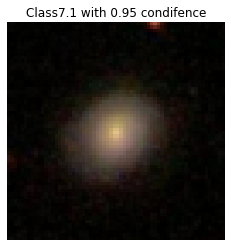

In [14]:
show_training_image(0, x_train, y_train)

### The rest will be done in Google Colab (using a Google backend GPU).